# Dropout

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [2]:
n_samples=20
n_hidden=300

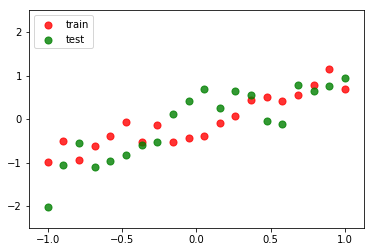

In [3]:
#training data
x=torch.unsqueeze(torch.linspace(-1, 1, n_samples), 1)
y=x+0.3*torch.normal(torch.zeros(n_samples, 1), torch.ones(n_samples, 1))

#test data
test_x=torch.unsqueeze(torch.linspace(-1, 1, n_samples), 1)
test_y=test_x+0.3*torch.normal(torch.zeros(n_samples, 1), torch.ones(n_samples, 1))

plt.scatter(x, y, c='red', s=50, alpha=0.8, label='train')
plt.scatter(test_x, test_y, c='green', s=50, alpha=0.8, label='test')
plt.legend(loc="upper left")
plt.ylim((-2.5, 2.5))
plt.show()

In [4]:
net_overfitting=torch.nn.Sequential(
                    torch.nn.Linear(1, n_hidden),
                    torch.nn.ReLU(),
                    torch.nn.Linear(n_hidden, n_hidden),
                    torch.nn.ReLU(),
                    torch.nn.Linear(n_hidden, 1))


net_dropped=torch.nn.Sequential(
                    torch.nn.Linear(1, n_hidden),
                    torch.nn.Dropout(0.5),   #it is just initialise zeros
                    torch.nn.ReLU(),
                    torch.nn.Linear(n_hidden, n_hidden),
                    torch.nn.BatchNorm1d(n_hidden),
                    torch.nn.ReLU(),
                    torch.nn.Linear(n_hidden, 1)
                    )

In [5]:
print(net_overfitting)
print(net_dropped)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [6]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

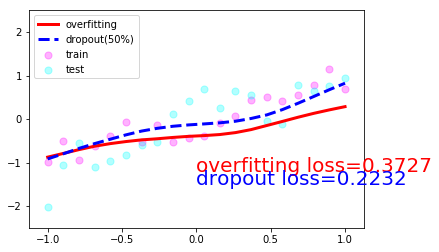

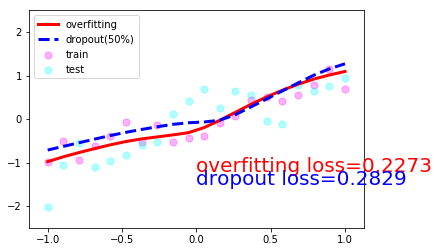

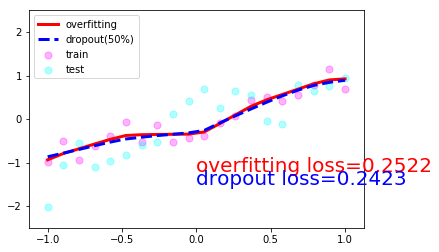

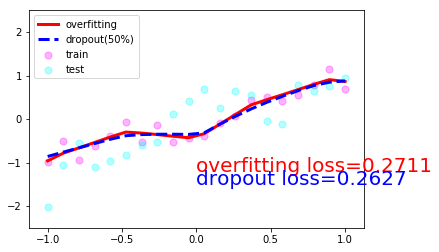

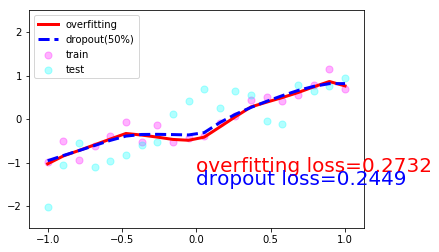

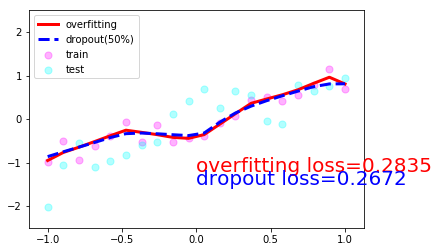

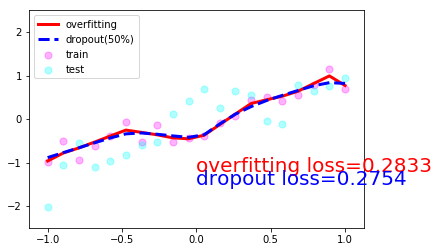

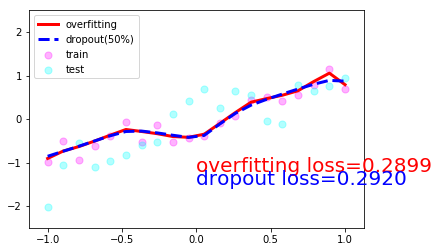

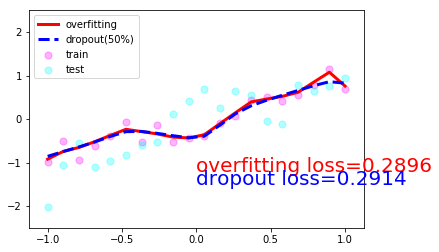

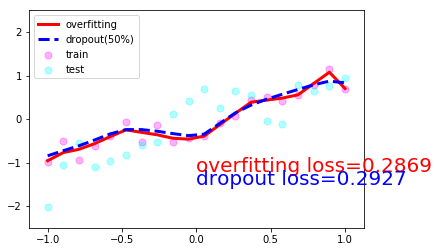

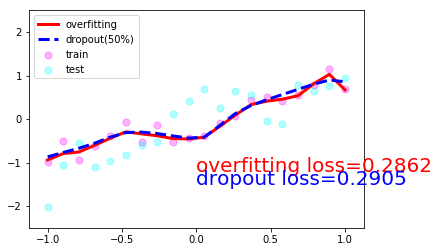

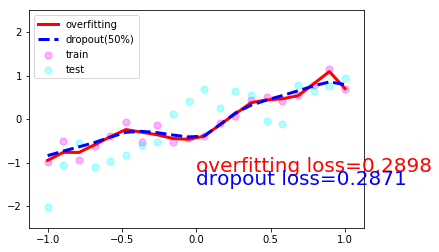

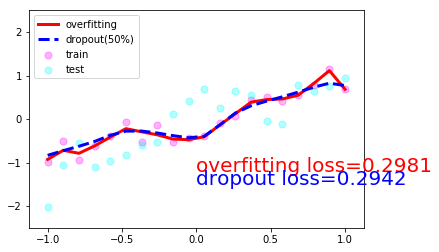

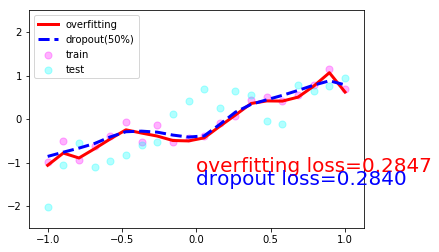

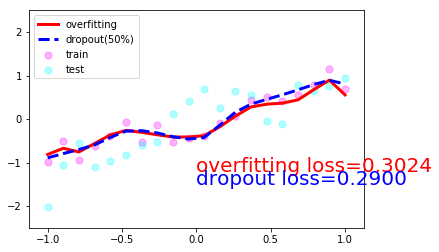

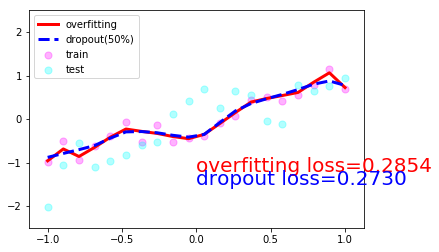

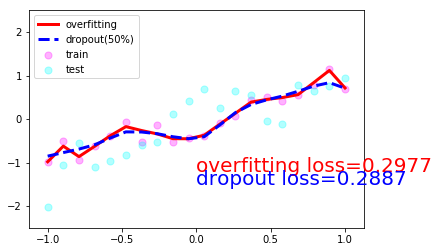

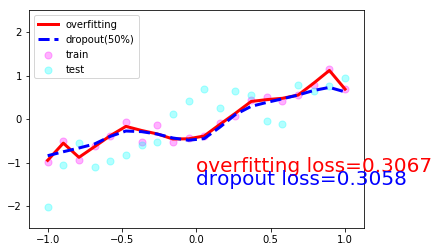

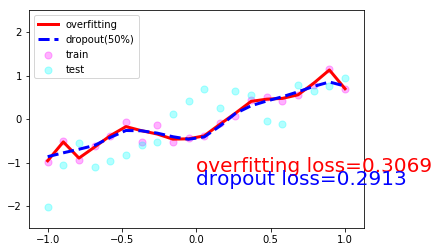

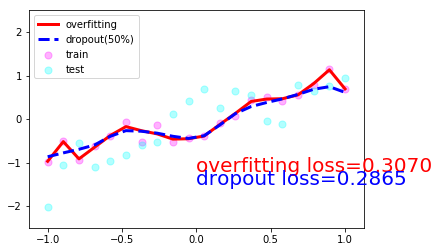

In [8]:
for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)

    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()

    if t % 25 == 0:
        # change to eval mode in order to fix drop out effect
        net_overfitting.eval()
        net_dropped.eval()  # parameters for dropout differ from train mode

        # plotting
        plt.cla()
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)
        plt.scatter(x, y, c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x, test_y, c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y), fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y), fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));

        # change back to train mode
        net_overfitting.train()
        net_dropped.train()
        
        plt.show()

In [45]:
torch.nn.Dropout?

# Normalisation

In [49]:
mean_01 = np.array([1.0, 4.0])
mean_02 = np.array([10.0, -4.0])

cov_01 = np.array([[3.0, 0.0],[0.0, 300.0]])
cov_02 = np.array([[3.0, 1.0],[1.0, 3.0]])

data_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
data_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

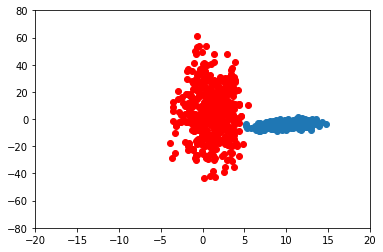

In [50]:
plt.xlim(-20, 20)
plt.ylim(-80, 80)
plt.scatter(data_01[:, 0], data_01[:, 1], color='red')
plt.scatter(data_02[:, 0], data_02[:, 1])
plt.show()

In [56]:
cov_03 = np.array([[5.0, 0.0],[0.0, 5.0]])
mean_03 = np.array([10.0, 40.0])

In [52]:
X1 = (data_01 - data_01.mean(axis=0)) / np.std(data_01, 0)
X2 = (data_02 - data_02.mean(axis=0)) / np.std(data_02, 0)
print(X2.mean())

-4.831690603168682e-16


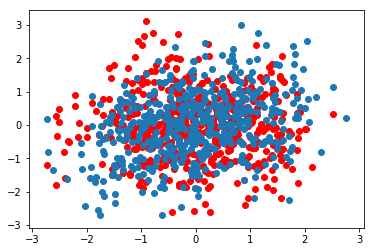

In [53]:
plt.scatter(X1[:, 0], X1[:, 1], color='r')
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [57]:
x1 = X1.dot(cov_03) + mean_03
x2 = X2.dot(cov_03) + mean_03

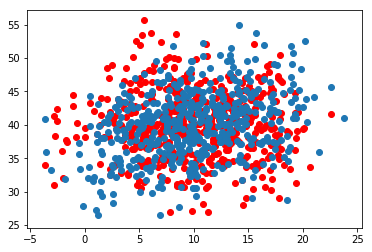

In [58]:
plt.scatter(x1[:, 0], x1[:, 1], color='r')
plt.scatter(x2[:, 0], x2[:, 1])
plt.show()